# HW2 Bank Failure Prediction
## Xin Qiu, Andrew ID: xq 

In [158]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [159]:
# read in csv file as pandas dataframe
df1 = pd.read_excel("Bank failure data.xlsx")
# retain an original copy of the dataframe generally. 
df = df1.copy()
# delete the column which will not be useful for regression. 
del df["Cert Number"]
df.head()

,Bank Name,Quarter,Tier One,Texas,Size,Brokered Deposits,Net Chargeoffs,Constr and Land Dev Loans,Change in Portfolio Mix,NP CRE to Assets,Volatile Liabilities to Assets,Securities,Failed during 2010Q2
0,Exchange Bank,2007Q4,14.90,19.36,32.852108,0.0,0.03,23.13,3.38,0.190681,20.16,99.07,No
1,Exchange Bank,2008Q1,14.30,20.86,33.542390,0.0,0.00,32.96,4.96,0.000000,21.23,99.45,No
2,Exchange Bank,2008Q2,14.15,20.89,34.140007,0.0,0.31,33.71,1.53,0.022408,19.69,97.94,No
3,Exchange Bank,2008Q3,14.13,18.74,34.038758,0.0,-0.02,34.99,3.80,0.147452,19.83,98.84,No
4,Exchange Bank,2008Q4,14.21,21.82,34.059328,0.0,1.21,37.14,3.86,0.057306,15.29,99.84,No


In [160]:
# Convert the label column from "Yes"/"No" to 1/0 respectively
df.loc[df['Failed during 2010Q2'] == "Yes", 'Failed during 2010Q2'] = 1
df.loc[df['Failed during 2010Q2'] == "No", 'Failed during 2010Q2'] = 0

# Handle missing values / NaN values. 
df.dropna(how='all',inplace=True)
df.head()

,Bank Name,Quarter,Tier One,Texas,Size,Brokered Deposits,Net Chargeoffs,Constr and Land Dev Loans,Change in Portfolio Mix,NP CRE to Assets,Volatile Liabilities to Assets,Securities,Failed during 2010Q2
0,Exchange Bank,2007Q4,14.90,19.36,32.852108,0.0,0.03,23.13,3.38,0.190681,20.16,99.07,0
1,Exchange Bank,2008Q1,14.30,20.86,33.542390,0.0,0.00,32.96,4.96,0.000000,21.23,99.45,0
2,Exchange Bank,2008Q2,14.15,20.89,34.140007,0.0,0.31,33.71,1.53,0.022408,19.69,97.94,0
3,Exchange Bank,2008Q3,14.13,18.74,34.038758,0.0,-0.02,34.99,3.80,0.147452,19.83,98.84,0
4,Exchange Bank,2008Q4,14.21,21.82,34.059328,0.0,1.21,37.14,3.86,0.057306,15.29,99.84,0


## What was the biggest bank at the end of 2009?

The biggest bank at the end of 2009 was Citibank (South Dakota), N.A.

In [161]:
#Get all data for the year 2009 Quarter 4
q4 = df[df["Quarter"] == "2009Q4"]
#Get biggest bank by size during 2009Q4
banksort = q4.sort_values(by=["Size"], ascending=False)
banksort.head(1)

,Bank Name,Quarter,Tier One,Texas,Size,Brokered Deposits,Net Chargeoffs,Constr and Land Dev Loans,Change in Portfolio Mix,NP CRE to Assets,Volatile Liabilities to Assets,Securities,Failed during 2010Q2
2618,"Citibank (South Dakota), N.A.",2009Q4,12.78,0.15,99.777234,95.78,5.66,0.0,25.28,0.0,18.37,107.54,0


## What trends do you observe in net chargeoffs over time?

Over time, net chargeoffs have an increasing trend with median, mean and max values generally grow with time (shown in log scale graph).

In [162]:
# group data by quarter and calculate median, mean, min and max for each quarter
dfcopy = df.copy()
dfgrouped = dfcopy['Net Chargeoffs'].groupby(dfcopy['Quarter'])
dfmedian = pd.DataFrame(dfgrouped.median())
dfmean = pd.DataFrame(dfgrouped.mean())
dfmin = pd.DataFrame(dfgrouped.min())
dfmax = pd.DataFrame(dfgrouped.max())

summary_stats_df = pd.DataFrame(columns=['median', 'mean','min','max'])
summary_stats_df['median'] = dfmedian['Net Chargeoffs']
summary_stats_df['mean'] = dfmean['Net Chargeoffs']
summary_stats_df['min'] = dfmin['Net Chargeoffs']
summary_stats_df['max'] = dfmax['Net Chargeoffs']
summary_stats_df = summary_stats_df.reset_index()
print(summary_stats_df)

  Quarter  median      mean   min     max
0  2007Q4   0.095  0.451139 -1.33    7.37
1  2008Q1   0.040  0.276049 -0.72    6.79
2  2008Q2   0.070  0.468966 -1.32   16.80
3  2008Q3   0.140  0.594296 -1.61    9.31
4  2008Q4   0.440  1.452463 -2.89   39.62
5  2009Q1   0.140  0.763793 -0.82   24.75
6  2009Q2   0.300  1.320691 -0.70   35.71
7  2009Q3   0.415  1.329458 -1.02   13.71
8  2009Q4   0.740  2.820395 -0.39  106.35
9  2010Q1   0.250  1.398670 -0.61   76.34


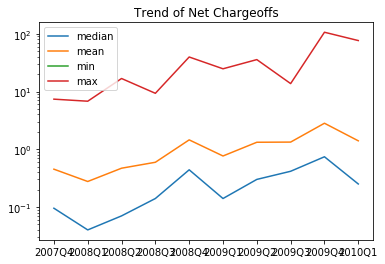

In [163]:
fig, ax = plt.subplots()
# Plot the summary statistics over time to get a sense of the trend
ax.plot(summary_stats_df['Quarter'], summary_stats_df["median"])
ax.plot(summary_stats_df['Quarter'], summary_stats_df["mean"])
ax.plot(summary_stats_df['Quarter'], summary_stats_df["min"])
ax.plot(summary_stats_df['Quarter'], summary_stats_df["max"])

plt.title("Trend of Net Chargeoffs")
plt.yscale("log")
plt.legend(['median', 'mean', 'min', 'max'])
plt.show()

## Is there a correlation between level of profitability of a bank’s investments in securities (here measured by fair value of investments over cost basis) and bank failure?

There isn't a very strong correlation between level of profitability of a bank's investements in securities and bank failure.

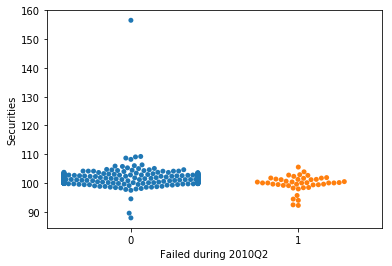

In [164]:
# Create a swarm plot to observe any correlation between Securities and bank failure
# Get data from 2010Q1
q1 = df[df["Quarter"] == "2010Q1"]
sns.swarmplot(y="Securities",x="Failed during 2010Q2",data=q1)
plt.show()

## What are the top two predictors of bank failure?

The top two predictors of bank failure are Construction and Land Development Loan Exposure, and Nonperforming Commercial Real Estate to Assets.

In [165]:
# Calculate Pearson's correlation co-efficient between every relevant column and bank failure
# Check out the function np.corrcoef().
print("Tier One: " )
print(np.corrcoef(df['Tier One'], df["Failed during 2010Q2"].astype(float)))
print("Texas: " )
print(np.corrcoef(df['Texas'], df["Failed during 2010Q2"].astype(float)))
print("Size: " )
print(np.corrcoef(df['Size'], df["Failed during 2010Q2"].astype(float)))
print("Brokered Deposits: " )
print(np.corrcoef(df['Brokered Deposits'], df["Failed during 2010Q2"].astype(float)))
print("Net Chargeoffs: " )
print(np.corrcoef(df['Net Chargeoffs'], df["Failed during 2010Q2"].astype(float)))
print("Constr and Land Dev Loans: " )
print(np.corrcoef(df['Constr and Land Dev Loans'], df["Failed during 2010Q2"].astype(float)))
print("Change in Portfolio Mix: " )
print(np.corrcoef(df['Change in Portfolio Mix'], df["Failed during 2010Q2"].astype(float)))
print("NP CRE to Assets: " )
print(np.corrcoef(df['NP CRE to Assets'], df["Failed during 2010Q2"].astype(float)))
print("Volatile Liabilities to Assets: " )
print(np.corrcoef(df['Volatile Liabilities to Assets'], df["Failed during 2010Q2"].astype(float)))
print("Securities: " )
print(np.corrcoef(df['Securities'], df["Failed during 2010Q2"].astype(float)))
# Using this output, conclude the two top predictors of bank failure are Constr and Land Dev Loans, and NP CRE to Assets.

Tier One: 
[[ 1.         -0.15188661]
 [-0.15188661  1.        ]]
Texas: 
[[nan nan]
 [nan  1.]]
Size: 
[[1.         0.19323814]
 [0.19323814 1.        ]]
Brokered Deposits: 
[[nan nan]
 [nan  1.]]
Net Chargeoffs: 
[[nan nan]
 [nan  1.]]
Constr and Land Dev Loans: 
[[1.         0.43678998]
 [0.43678998 1.        ]]
Change in Portfolio Mix: 
[[1.         0.00770893]
 [0.00770893 1.        ]]
NP CRE to Assets: 
[[1.         0.40399195]
 [0.40399195 1.        ]]
Volatile Liabilities to Assets: 
[[1.         0.19539087]
 [0.19539087 1.        ]]
Securities: 
[[ 1.         -0.15422274]
 [-0.15422274  1.        ]]


## Which banks are most likely to fail in the near future (and why)?

The banks that are most likely to fail in the near future are: Citizens Bank & Trust Company of Chicago, New Century Bank, Arcola Homestead Savings Bank, Wheatland Bank, Peninsula Bank, Peninsula Bank, High Desert State Bank, Bank of Florida - Southwest, Beach First National Bank, Sun West Bank.

In [166]:
# X - Get the columns which you will use as features to train your model.
# Y - Labels (did the bank fail?)
cols = ["Tier One", "Size", "Constr and Land Dev Loans", "Change in Portfolio Mix", "NP CRE to Assets", "Volatile Liabilities to Assets", "Securities"] 

# Create the training and test datasets.
# All bank data for 2010Q1 i.e year 2010 quarter 1 --> Use as TEST DATA 
# All rows that are before 2010Q1 -> Use as TRAINING DATA
train_data = df[df["Quarter"] != "2010Q1"]
X_train = train_data[cols]
Y_train = train_data["Failed during 2010Q2"].astype(float)

test_data = df[df["Quarter"] == "2010Q1"]
# test_data = test_data.reset_index(drop=True)
x_test = test_data[cols]
y_test = test_data["Failed during 2010Q2"].astype(float)

In [167]:
# Instantiate the LogisticRegression object and FIT the model using training data
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

# Print the accuracy of the model on training data
print(logreg.score(X_train,Y_train))

0.9304871373836892


In [168]:
# Get predictions for test data. 
# Remember, the test data is present in the x_test dataframe
y_predicted = logreg.predict(x_test)
print("Number of banks predicted to fail "+ str(np.sum(y_predicted)))

# Calculate the accuracy of the model on test data
# Accuracy  = number of correct predictions / number of predictions
accuracy = np.sum(y_test) / np.sum(y_predicted)
print("Accuracy of logistic regression model = " + str(accuracy))

Number of banks predicted to fail 51.0
Accuracy of logistic regression model = 0.8431372549019608


In [169]:
# Now, we need to get the top two banks that are likely to fail.
# To get the probability that a bank will fail, use the function logreg.predict_proba(test_data). 
prob = logreg.predict_proba(x_test)
# Add the failure probability information to test_prob dataframe.
test_prob = test_data.copy()
test_prob = test_prob.reset_index()
test_prob["Fail Probability"] = None
for i in range (0, len(test_data)):
    test_prob.loc[i, "Fail Probability"] = prob[i][1]

In [170]:
# sort test_prob dataframe to get banks that have high fail probability
testprobsort = test_prob.sort_values(by=["Fail Probability"], ascending=False)
testprobsort.head(10)

,index,Bank Name,Quarter,Tier One,Texas,Size,Brokered Deposits,Net Chargeoffs,Constr and Land Dev Loans,Change in Portfolio Mix,NP CRE to Assets,Volatile Liabilities to Assets,Securities,Failed during 2010Q2,Fail Probability
327,3279,Citizens Bank & Trust Company of Chicago,2010Q1,0.71,806.91,21.655706,0.39,2.28,10.93,5.39,22.057423,26.83,102.63,1,0.999987
331,3319,New Century Bank,2010Q1,1.17,400.05,41.263492,0.00,0.03,43.56,1.69,8.941975,36.13,99.59,1,0.999304
300,3009,Arcola Homestead Savings Bank,2010Q1,-11.51,92.86,5.779091,7.17,-0.44,6.32,16.85,7.147052,33.95,100.00,1,0.998473
370,3709,AmericanFirst Bank,2010Q1,-0.44,NaN,25.429382,6.00,12.85,22.86,2.01,7.882039,46.84,100.60,1,0.995254
393,3939,Wheatland Bank,2010Q1,-2.99,NaN,41.128037,8.58,0.71,29.83,1.14,6.171014,19.24,103.86,1,0.994642
279,2799,Peninsula Bank,2010Q1,-2.04,778.79,44.986598,0.12,0.69,36.20,6.91,4.064242,47.86,99.16,1,0.994602
344,3449,High Desert State Bank,2010Q1,-1.15,NaN,22.623701,0.00,8.16,50.51,7.27,2.344946,40.99,100.00,1,0.993945
340,3409,Bank of Florida - Southwest,2010Q1,-2.98,1358.18,45.169655,11.72,14.62,14.55,0.70,7.334910,36.72,100.08,1,0.992548
320,3209,Beach First National Bank,2010Q1,1.79,455.19,44.271742,3.83,10.69,22.18,1.14,7.855952,51.90,100.46,1,0.992192
330,3309,Sun West Bank,2010Q1,1.48,425.27,38.927510,12.22,1.49,25.93,3.14,7.770156,24.61,101.14,1,0.991541


In [171]:
# Use the threshold value to only consider banks that are going to fail with a probability greater than this threshold.
threshold = 0.75
# Print the bank names that are most likely to fail
print("Banks most likely to fail are:\n")
testprobsort.reset_index(inplace=True)
for i in range (0, len(testprobsort)):
    if (testprobsort.loc[i, "Fail Probability"] > threshold) :
        print(testprobsort.loc[i, "Bank Name"])

Banks most likely to fail are:

Citizens Bank & Trust Company of Chicago
New Century Bank
Arcola Homestead Savings Bank
AmericanFirst Bank
Wheatland Bank
Peninsula Bank
High Desert State Bank
Bank of Florida - Southwest
Beach First National Bank
Sun West Bank
City Bank
Broadway Bank
Bank of Florida - Tampa Bay
Gulf State Community Bank
Pinehurst Bank
Bank of Florida - Southeast
Lakeside Community Bank
Southwest Community Bank
First National Bank Savannah Ga
Westernbank Puerto Rico
Champion Bank
Nevada Security Bank
Frontier Bank
Satilla Community Bank
Washington First International Bank
Innovative Bank
Bank of Miami, National Association
Heritage Bank of North Florida
Towne Bank of Arizona
CF Bancorp
North Alabama Bank
New Liberty Bank
R-G Premier Bank of Puerto Rico
Midwest Bank and Trust Company
Bank of Bonifay
Eurobank
First National Bank Rosedale Miss
Butler Bank (MHC)
Darby Bank & Trust Company
Legacy Bank


## Reference
1. Building A Logistic Regression in Python, Step by Step
https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8